In [1]:
from random import random, seed, randrange
from math import floor, pi
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
import pandas as pd
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
from time import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [2]:
%run -i 'gcmc.py'

In [3]:
yco = 0.5
P_res = 100*10**5 #[Pa]
T = 45 + 273.15 #K
fco, fme = PR_Fugacity( P_res/10**5, T, yco )
fco = fco*10**5
fme = fme*10**5

print( "Co:\t", round( fme/10**5, 1 ), "bar\tMe:\t", round( fme/10**5, 1 ), "bar")

s_box = 57.15
N_max = 50000
Vol = s_box**3
kb = 1.3806*10**(7) #[Pa*A^3/K]
Nco = 0 #floor(fco*Vol/kb/T)
Nme = 0 #floor(fme*Vol/kb/T)
Nc = 0
rc = s_box
beta = 1/T
zz_co = beta*fco
zz_me = beta*fme
delta = 1
pi_move = 0.5

print( floor(fco*Vol/kb/T) )
print( floor(fme*Vol/kb/T) )

N_moves = 100
N_equil = 0
N_prod = 200000/N_moves


Co:	 44.6 bar	Me:	 44.6 bar
137
189


In [129]:
for i in range(1):
    t0 = time()
    Nco = 0 #floor(fco*Vol/kb/T)
    Nme = 0 #floor(fme*Vol/kb/T)
    delta = 1
    rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run(verbose = False)
    filename = "newrun" + str(i) + ".csv"
    output = pd.DataFrame()
    output['rhocov'] = rhocov
    output['rhomev'] = rhomev
    output['Env'] = Env
    output['Pv'] = Pv
    output['Ncov'] = Ncov
    output['Nmev'] = Nmev
    #output = pd.DataFrame( rhocov = rhocov, rhomev = rhomev, Env = Env, Pv = Pv, Ncov = Ncov, Nmev = Nmev)
    output.to_csv( filename, index = False)
    t = time()
    print( t - t0)

694.715548992157


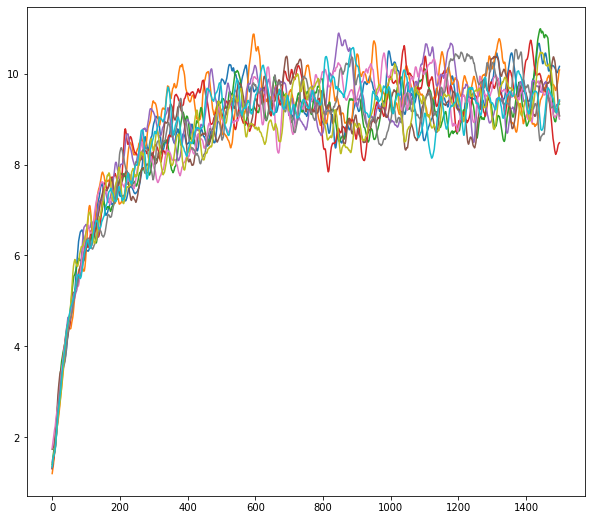

In [122]:
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    df = df[df.Pv < 50]
    df = df[df.Pv > 0]
    #plt.plot( df.Pv )
    #plt.plot( gaussian_filter1d( df.Pv, sigma=10) )
    plt.plot( df.Pv.rolling(10,min_periods=1).mean() )

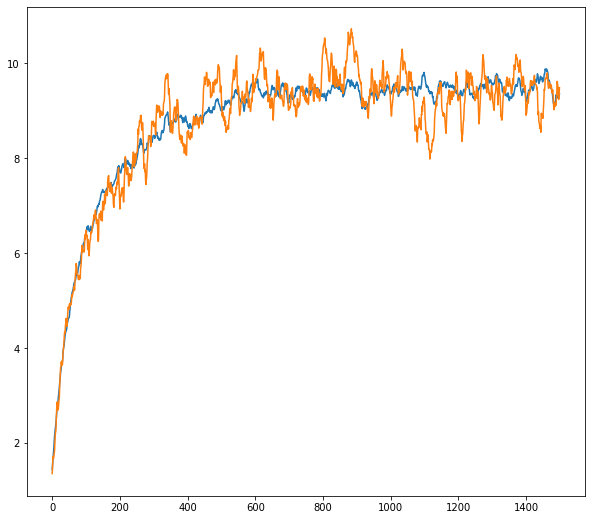

In [138]:
df_all = pd.DataFrame()
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    df_all['P'+str(i)] = df.Pv
#df_all.head()
plt.plot( df_all.mean(axis=1) )
plt.plot( df.Pv )

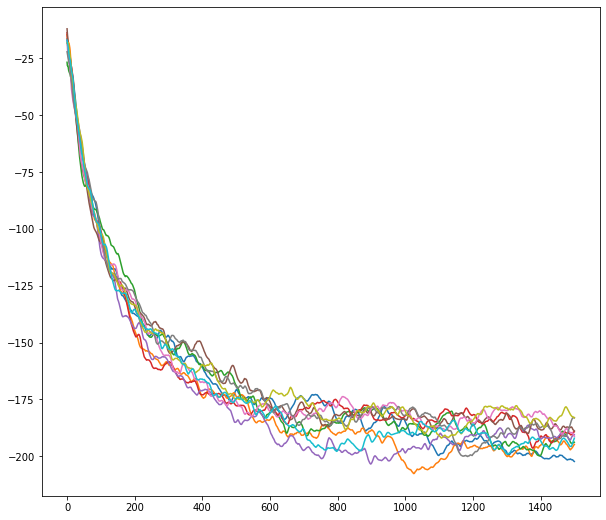

In [123]:
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    df = df[df.Pv < 50]
    df = df[df.Pv > 0]
    # plt.plot( df.Env )
    #plt.plot( gaussian_filter1d( df.Env, sigma=20) )
    plt.plot( df.Env.rolling(10,min_periods=1).mean() )

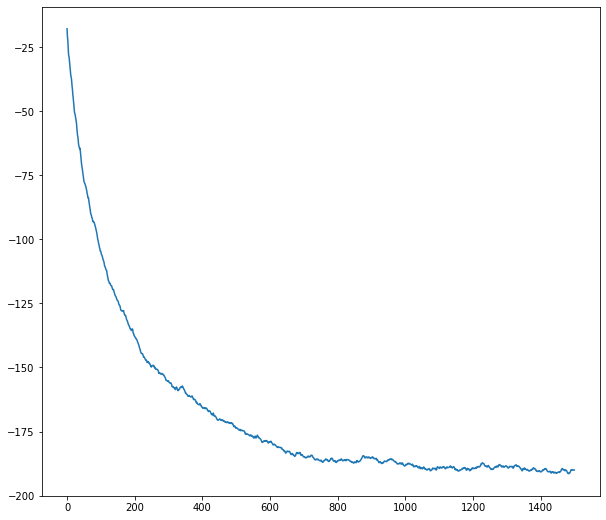

In [134]:
df_all = pd.DataFrame()
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    df_all['En'+str(i)] = df.Env
#df_all.head()
plt.plot( df_all.mean(axis=1) )

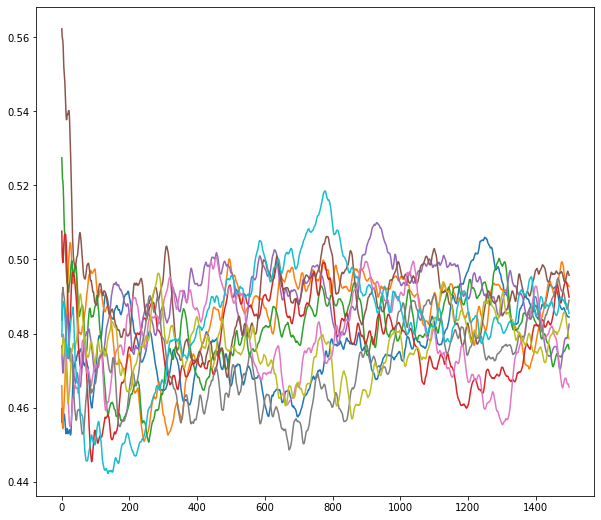

In [124]:
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    df = df[df.Pv < 50]
    df = df[df.Pv > 0]
    yco = df.Ncov/(df.Ncov + df.Nmev)
    #plt.plot( yco )
    #plt.plot( gaussian_filter1d( yco, sigma=20) )
    plt.plot( yco.rolling(10,min_periods=1).mean() )

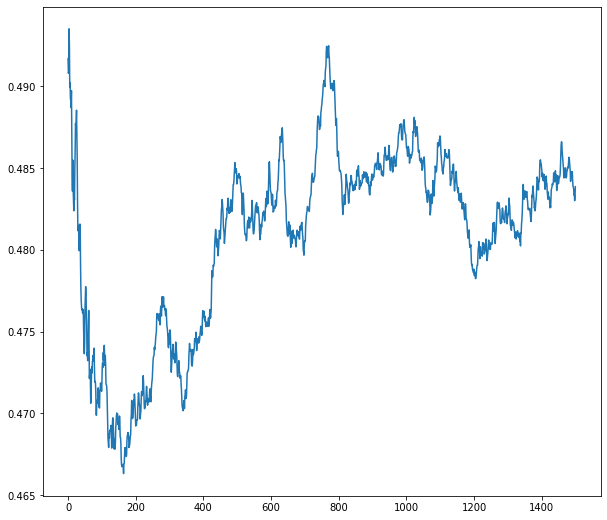

In [135]:
df_all = pd.DataFrame()
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    yco = df.Ncov/(df.Ncov + df.Nmev)
    df_all['yc'+str(i)] = yco
#df_all.head()
plt.plot( df_all.mean(axis=1) )

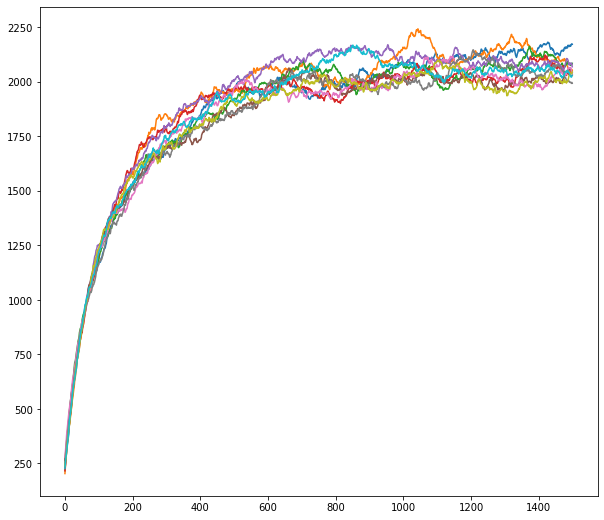

In [125]:
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    df = df[df.Pv < 50]
    df = df[df.Pv > 0]
    N = df.Ncov + df.Nmev
    plt.plot( N )
    # plt.plot( N.rolling(40,min_periods=1).mean() )

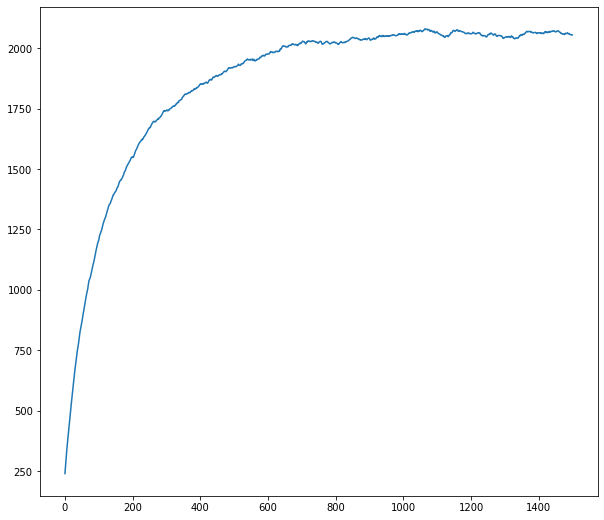

In [137]:
df_all = pd.DataFrame()
for i in range(10):
    df = pd.read_csv('newrun'+ str(i) + ".csv")
    N = df.Ncov + df.Nmev
    df_all['N'+str(i)] = N
#df_all.head()
plt.plot( df_all.mean(axis=1) )